<a href="https://colab.research.google.com/github/adityabissa/6thSem-ML-Lab/blob/main/1BM22CS016_Lab_6_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for encoding categorical features

# Load datasets
iris = pd.read_csv("iris.csv")
drug = pd.read_csv("/content/drug.csv")
petrol = pd.read_csv("/content/petrol_consumption.csv")

# --- Decision Tree Classifier for IRIS dataset ---
X_iris = iris.iloc[:, :-1]
y_iris = iris.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print("Decision Tree Classification for IRIS Dataset:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Decision Tree Classifier for Drug dataset ---
X_drug = drug.iloc[:, :-1]
y_drug = drug.iloc[:, -1]

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the categorical features in X_drug
for col in X_drug.select_dtypes(include=['object']).columns:
    X_drug[col] = le.fit_transform(X_drug[col]) # Encode categorical features to numerical values

X_train, X_test, y_train, y_test = train_test_split(X_drug, y_drug, test_size=0.2, random_state=42)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print("\nDecision Tree Classification for Drug Dataset:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Decision Tree Regression for Petrol Consumption ---
X_petrol = petrol.iloc[:, :-1]
y_petrol = petrol.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_petrol, y_petrol, test_size=0.2, random_state=42)

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

print("\nDecision Tree Regression for Petrol Consumption:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))


Decision Tree Classification for IRIS Dataset:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Decision Tree Classification for Drug Dataset:
Accuracy: 1.0
Confusion Matrix:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]

Classification Report:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       dr

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Best k value: 7 with accuracy: 91.80%
Accuracy on test data: 91.80%


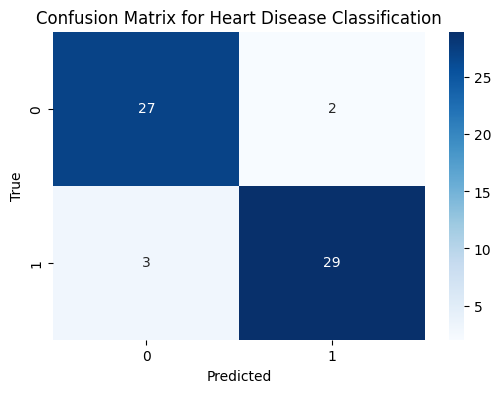

Classification Report for Heart Disease Classification:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

heart_df = pd.read_csv('heart.csv')

print(heart_df.head())

X = heart_df.drop(columns=['target'])
y = heart_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = range(1, 21)
best_k = 1
best_score = 0

for k in k_values:

    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)

    score = accuracy_score(y_test, y_pred)

    if score > best_score:
        best_score = score
        best_k = k

print(f"Best k value: {best_k} with accuracy: {best_score * 100:.2f}%")

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

y_pred_best = best_knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.title("Confusion Matrix for Heart Disease Classification")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Classification Report for Heart Disease Classification:")
print(classification_report(y_test, y_pred_best))